In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
file = 'covid_data.csv'
df = pd.read_csv(file, encoding="ISO-8859-1")

In [3]:
df
del df['Province/State']
del df['Last Update']
del df['SNo']

In [4]:
# mexico_data = df.loc[df['Country/Region'] == 'Mexico',:]
# mexico_data
date = df['ObservationDate'].str.split(pat="/", expand = True)
# df['Day'] = date[1]
df['Month'] = date[0]
df['Year'] = date[2]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Month,Year
0,01/22/2020,Mainland China,1,0,0,01,2020
1,01/22/2020,Mainland China,14,0,0,01,2020
2,01/22/2020,Mainland China,6,0,0,01,2020
3,01/22/2020,Mainland China,1,0,0,01,2020
4,01/22/2020,Mainland China,0,0,0,01,2020
...,...,...,...,...,...,...,...
205946,01/19/2021,Ukraine,62492,738,39168,01,2021
205947,01/19/2021,Netherlands,13031,149,0,01,2021
205948,01/19/2021,Mainland China,1316,1,1298,01,2021
205949,01/19/2021,Ukraine,42758,707,37834,01,2021


In [5]:
m = (df['Country/Region'] == 'Mexico') | (df['Country/Region'] == 'United States') | (df['Country/Region'] == 'Canada')
clean_df = df.loc[m,:]
clean_df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Month,Year
81,01/23/2020,Mexico,0,0,0,01,2020
215,01/26/2020,Canada,1,0,0,01,2020
261,01/27/2020,Canada,1,0,0,01,2020
312,01/28/2020,Canada,1,0,0,01,2020
313,01/28/2020,Canada,1,0,0,01,2020
...,...,...,...,...,...,...,...
205891,01/19/2021,Mexico,0,0,1251782,01,2021
205911,01/19/2021,Mexico,47227,6754,0,01,2021
205940,01/19/2021,Mexico,28558,2566,0,01,2021
205941,01/19/2021,Canada,70,1,69,01,2021


In [12]:
clean_df2 = clean_df.drop(['ObservationDate'],axis=1)
clean_df3 = clean_df2.groupby(['Country/Region','Month'])
clean_df3.head()

,Country/Region,Confirmed,Deaths,Recovered,Month,Year
81,Mexico,0,0,0,01,2020
215,Canada,1,0,0,01,2020
261,Canada,1,0,0,01,2020
312,Canada,1,0,0,01,2020
313,Canada,1,0,0,01,2020
...,...,...,...,...,...,...
168398,Canada,17107,328,7713,12,2020
191667,Mexico,17021,1371,0,01,2021
191713,Mexico,34889,5559,0,01,2021
191714,Mexico,17820,784,0,01,2021


TypeError: unhashable type: 'numpy.ndarray'

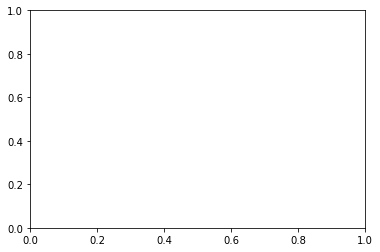

In [17]:
month = clean_df3['Month']
confirmed = clean_df3['Confirmed']

plt.plot(month,confirmed, color="blue", label="Covid Cases" )
plt.show()